In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split
import matplotlib.pyplot as plt

from model.crnn import CRNN

from dataset import DatasetImg
from tools.utils import *
from tools.StrLabelConverter import *
from trainer import *



c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(1708)
np.random.seed(1708)
torch.manual_seed(1708) # Comment lại để cho khởi tạo tham số ngẫu nhiên


In [3]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/alphabet.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


151

# Load model

In [4]:
logs = []

In [5]:
model = CRNN(converter.numClass, 256, dropout=0.4).to(device)

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


>>>> use Crnn-------------



In [9]:
checkpoint = 'checkpoint/checkpoint-50.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

In [10]:
logs.append(log)

In [11]:
len(logs)

2

# Visualize

## Fine tune dropout with num_hidden = 128

In [39]:
train_metrics = []
test_metrics = []

for log in logs:
    train_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }

    test_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }
    for i, item in enumerate(log):
        if( item['type'] == 'train'):
            train_metric['epoch'].append(item['epoch'])
            train_metric['avg_loss'].append(item['metric']['avg_loss'])
            train_metric['avg_cer'].append(item['metric']['avg_cer'])
            train_metric['avg_wer'].append(item['metric']['avg_wer'])
        else:
            test_metric['epoch'].append(item['epoch'])
            test_metric['avg_loss'].append(item['metric']['avg_loss'])
            test_metric['avg_cer'].append(item['metric']['avg_cer'])
            test_metric['avg_wer'].append(item['metric']['avg_wer'])
    train_metrics.append(train_metric)
    test_metrics.append(test_metric)



In [41]:
train_metrics.__len__()

4

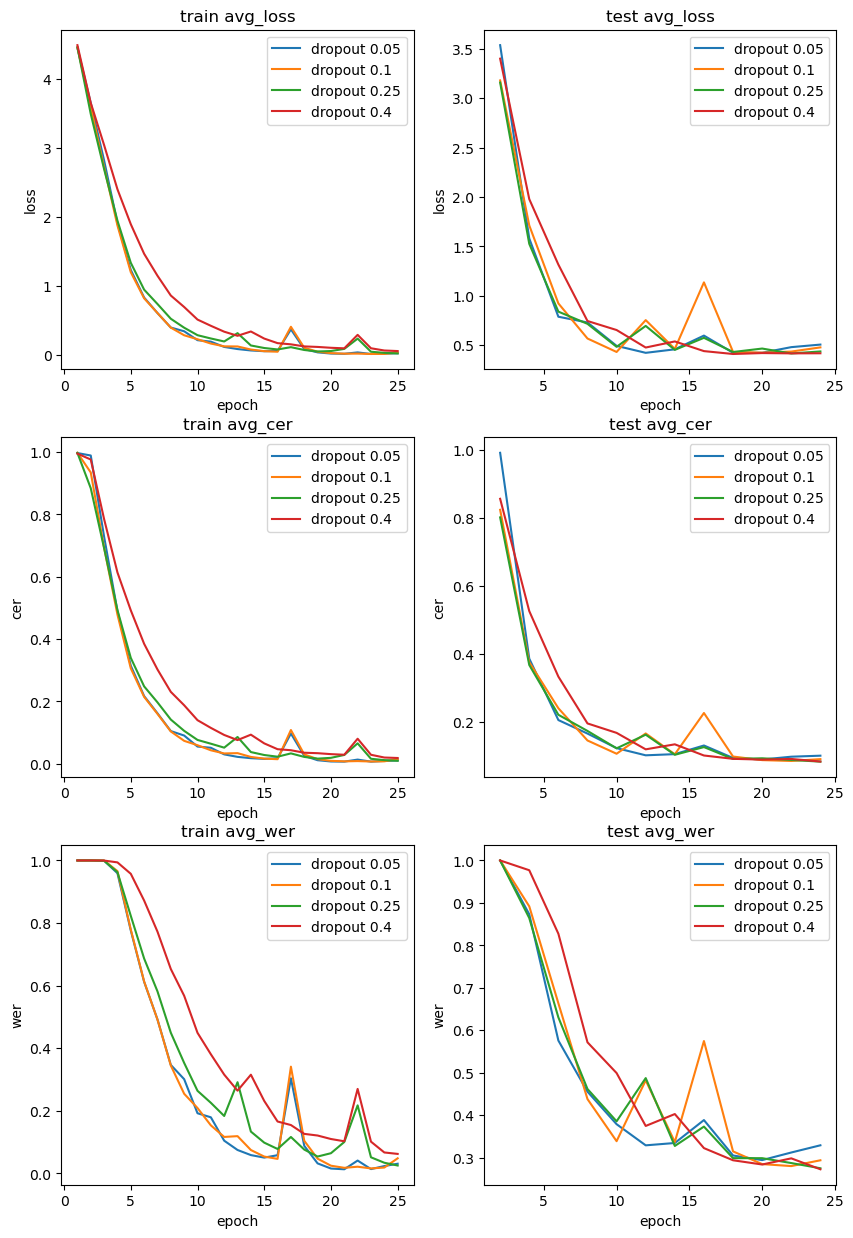

In [49]:
lbl = [0.05, 0.1, 0.25, 0.4]
plt.figure(figsize=(10, 15)) 

plt.subplot(3, 2, 1)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('train avg_loss')

plt.subplot(3, 2, 3)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
plt.legend()
plt.title('train avg_cer')

plt.subplot(3, 2, 5)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
plt.legend()
plt.title('train avg_wer')

# --------------------------------------------------------
plt.subplot(3, 2, 2)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('test avg_loss')

plt.subplot(3, 2, 4)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
plt.legend()
plt.title('test avg_cer')

plt.subplot(3, 2, 6)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'dropout '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
plt.legend()
plt.title('test avg_wer')
plt.show()

## Fine tune num_hidden with dropout = 0.1

In [74]:
train_metrics = []
test_metrics = []

for log in logs:
    train_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }

    test_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }
    for i, item in enumerate(log):
        if( item['type'] == 'train'):
            train_metric['epoch'].append(item['epoch'])
            train_metric['avg_loss'].append(item['metric']['avg_loss'])
            train_metric['avg_cer'].append(item['metric']['avg_cer'])
            train_metric['avg_wer'].append(item['metric']['avg_wer'])
        else:
            test_metric['epoch'].append(item['epoch'])
            test_metric['avg_loss'].append(item['metric']['avg_loss'])
            test_metric['avg_cer'].append(item['metric']['avg_cer'])
            test_metric['avg_wer'].append(item['metric']['avg_wer'])
    train_metrics.append(train_metric)
    test_metrics.append(test_metric)



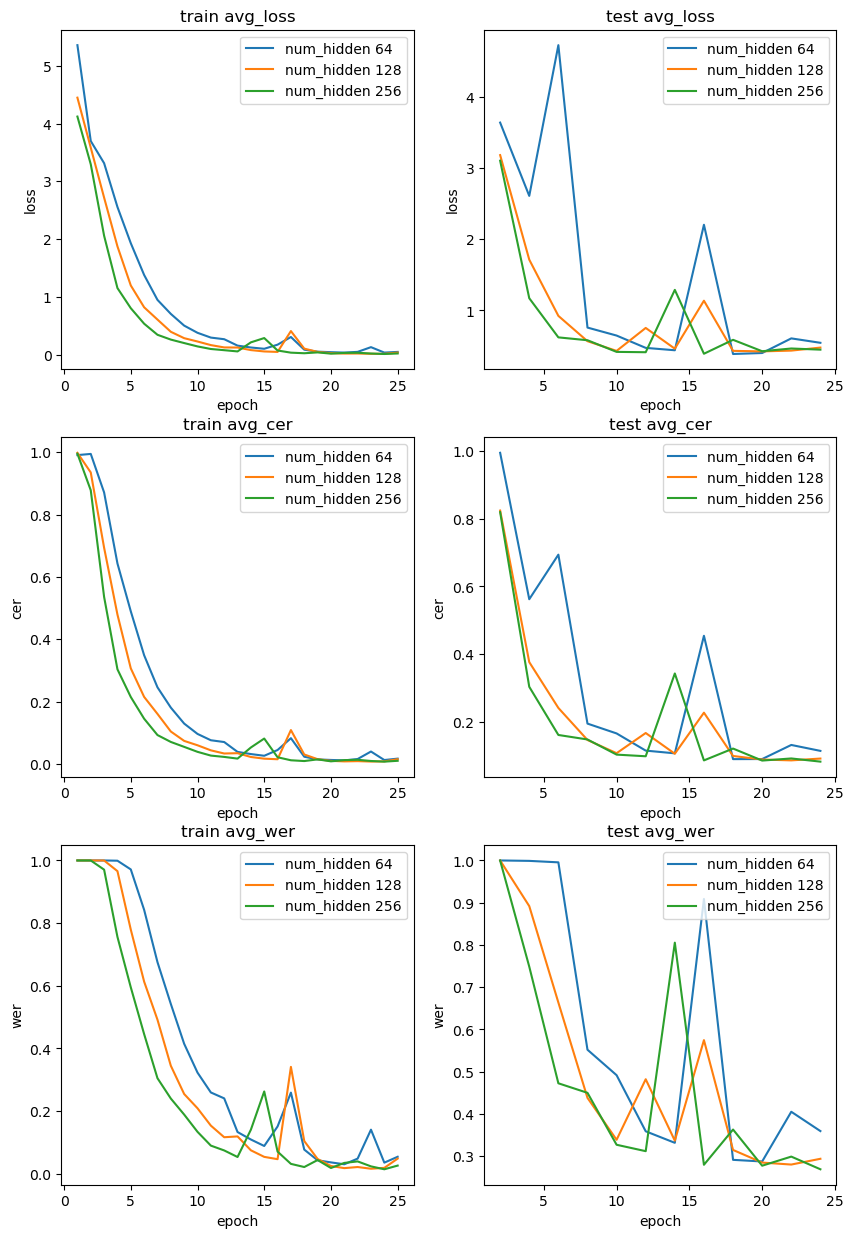

In [75]:
lbl = [64, 128, 256]
plt.figure(figsize=(10, 15)) 

plt.subplot(3, 2, 1)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('train avg_loss')

plt.subplot(3, 2, 3)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
plt.legend()
plt.title('train avg_cer')

plt.subplot(3, 2, 5)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
plt.legend()
plt.title('train avg_wer')

# --------------------------------------------------------
plt.subplot(3, 2, 2)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('test avg_loss')

plt.subplot(3, 2, 4)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
plt.legend()
plt.title('test avg_cer')

plt.subplot(3, 2, 6)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
plt.legend()
plt.title('test avg_wer')
plt.show()

# Đánh giá model cuối cùng

In [87]:
train_metrics = []
test_metrics = []

for log in logs:
    train_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }

    test_metric = {
        'epoch': [],
        'avg_loss':[],
        'avg_cer' : [],
        'avg_wer' : []
    }
    for i, item in enumerate(log):
        if( item['type'] == 'train'):
            train_metric['epoch'].append(item['epoch'])
            train_metric['avg_loss'].append(item['metric']['avg_loss'])
            train_metric['avg_cer'].append(item['metric']['avg_cer'])
            train_metric['avg_wer'].append(item['metric']['avg_wer'])
        else:
            test_metric['epoch'].append(item['epoch'])
            test_metric['avg_loss'].append(item['metric']['avg_loss'])
            test_metric['avg_cer'].append(item['metric']['avg_cer'])
            test_metric['avg_wer'].append(item['metric']['avg_wer'])
    train_metrics.append(train_metric)
    test_metrics.append(test_metric)



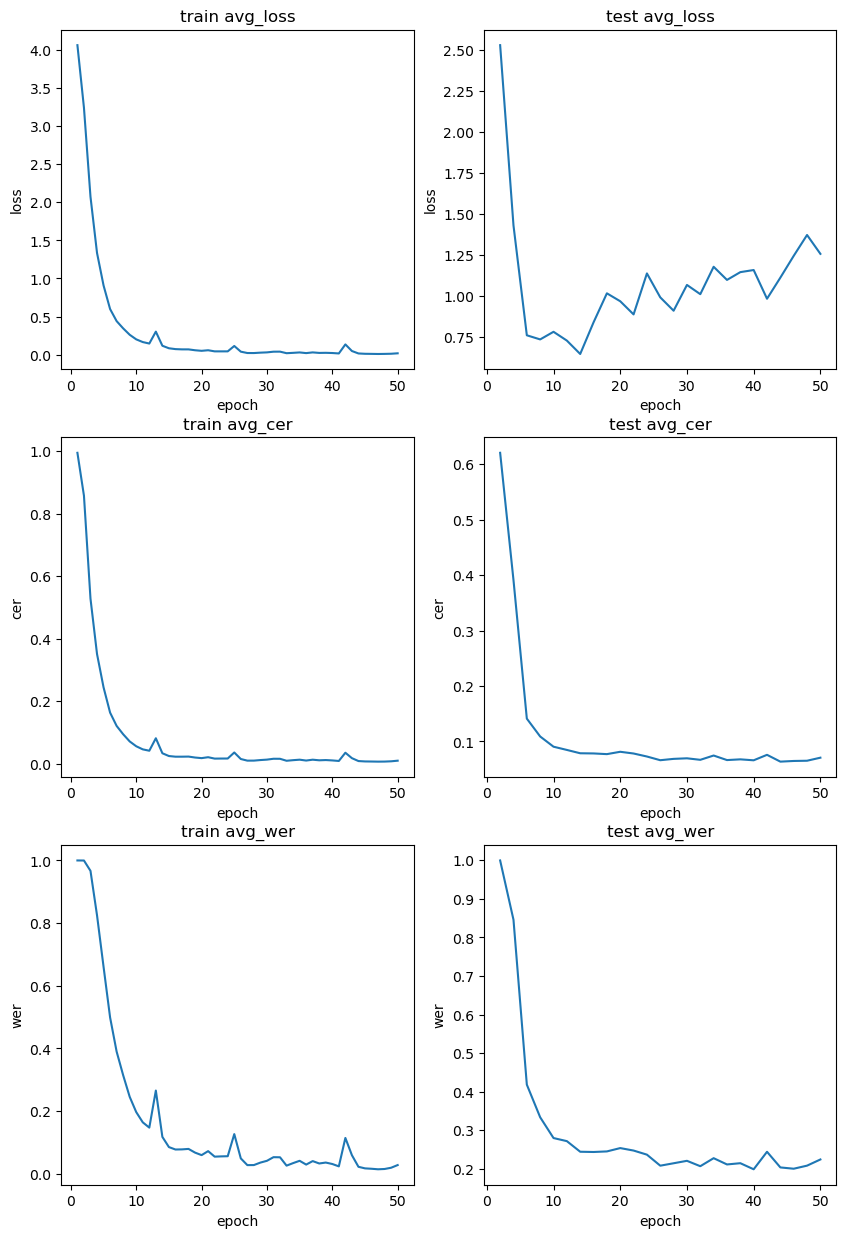

In [88]:
lbl = [64, 128, 256]
plt.figure(figsize=(10, 15)) 

plt.subplot(3, 2, 1)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
# plt.legend()
plt.title('train avg_loss')

plt.subplot(3, 2, 3)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
# plt.legend()
plt.title('train avg_cer')

plt.subplot(3, 2, 5)
for i, train_metric in enumerate(train_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
# plt.legend()
plt.title('train avg_wer')

# --------------------------------------------------------
plt.subplot(3, 2, 2)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_loss'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("loss")
# plt.legend()
plt.title('test avg_loss')

plt.subplot(3, 2, 4)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_cer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("cer")
# plt.legend()
plt.title('test avg_cer')

plt.subplot(3, 2, 6)
for i, train_metric in enumerate(test_metrics):
    plt.plot(train_metric['epoch'], train_metric['avg_wer'], label = 'num_hidden '+ str(lbl[i]))
plt.xlabel("epoch")
plt.ylabel("wer")
# plt.legend()
plt.title('test avg_wer')
plt.show()

# Dự đoán 1 ảnh

In [12]:
model = CRNN(converter.numClass, 256, dropout=0.4).to(device)

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


>>>> use Crnn-------------



In [13]:
checkpoint = 'checkpoint/checkpoint-15.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

In [14]:
from tester import Tester

tester = Tester(model, criterion, converter)

# Dự đoán nhiều ảnh

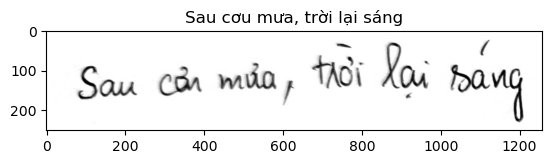

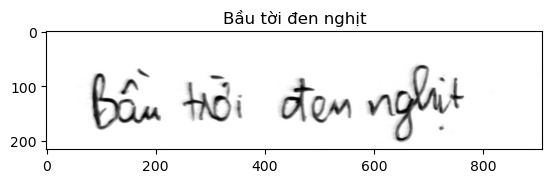

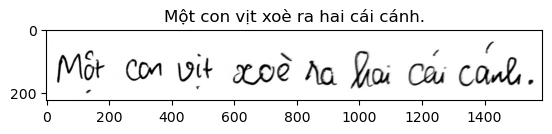

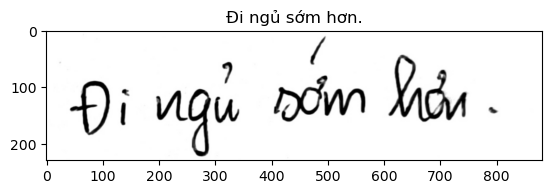

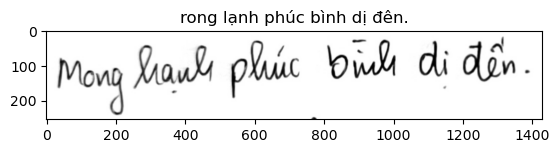

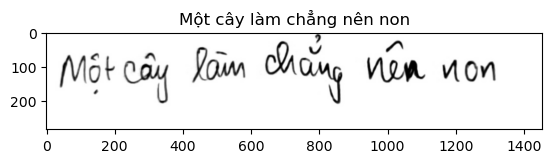

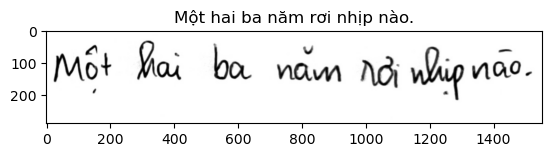

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/testModel/img'
for path in os.listdir(root):
        imgpath = root + '/' + path
        img = Image.open(imgpath)
        plt.imshow(img)
        plt.title(tester.predict(imgpath))
        plt.show()
        
        